# Binary Trees 

This notebook contains a implementation of binary trees without balancing 

## Function

In [3]:
class Binary_Node:
    def __init__(self,x):
        self.item = x
        self.left = None 
        self.right = None
        self.parent = None 

    def subtree_iter(self):
        if self.left: yield from self.left.subtree_iter()
        yield self.item
        if self.right: yield from self.right.subtree_iter()

    def subtree_first(self):
        if self.left: return self.left.subtree_first()
        else: return self

    def subtree_last(self):
        if self.right: return self.right.subtree_last()
        else: return self 

    def successor(self):
        if self.right: return self.right.subtree_first()
        while self.parent and (self.parent.right is self):
            self = self.parent
    
        return self.parent 
    
    def predecessor(self):
        if self.left: return self.left.subtree_last()
        while self.parent and (self.parent.left is self):
            self = self.parent 

        return self.parent 
    
    def subtree_insert_before(self,node):
        if self.left:
            A = self.left.subtree_last()
            A.right, node.parent = node, A
        else:
            self.left, node.parent = node, self

    def subtree_insert_after(self,node):
        if self.right:
            A = self.right.subtree_first()
            A.left, node.parent = node, A
        else:
            self.right, node.parent = node, self

    def subtree_delete(self):
        if self.left:
            pred=self.predecessor()
            self.item,pred.item=pred.item,self.item
            self=pred
        elif self.right:
            successor=self.successor()
            self.item,successor.item=successor.item,self.item
            self=successor
        else:
            if self.parent.right is self:
                self.parent.right = None
            else:
                self.parent.left = None
    

## Exercises 

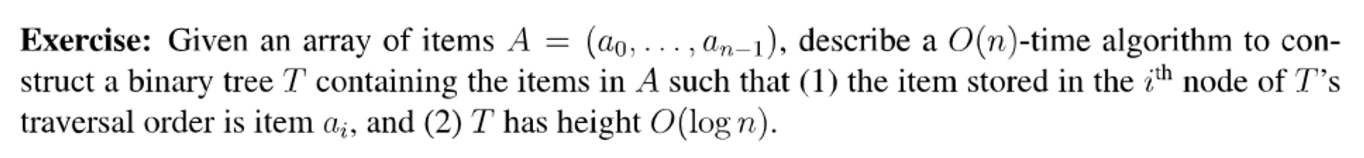

### Solution 

This problem can be solved recursively. Start with locating the item in the middle of the array and add it the root binary tree. Then add everything to the left of the middle of the array if allocated to the left subtree of the root node. Everything to the right of the middle of the array gets to allocated to the right subtree of the root node. This ensures roughly an O(logn) height and O(n) execution time. 

The code for which is presented below:

In [11]:

def build_subarray(A,subtree,left=True):    
    c=int((len(A)-1)/2)
    
    if subtree.item==None:
        subtree.item=A[c]
    else:
        temp_tree=Binary_Node(A[c])
        if left:
            subtree.left,temp_tree.parent=temp_tree,subtree
            subtree=subtree.left
        else:
            subtree.right,temp_tree.parent=temp_tree,subtree
            subtree=subtree.right

    if c==0:
        if len(A)==2:
            temp_tree2=Binary_Node(A[c+1])
            temp_tree.right,temp_tree2.parent=temp_tree2,temp_tree
    else:
        build_subarray(A[:c],left=True,subtree=subtree)
        build_subarray(A[c+1:],left=False,subtree=subtree)
    

In [18]:
binary_tree=Binary_Node(None)
build_subarray([1,2,3,4,5,6,7,8,9],binary_tree)

for i in binary_tree.subtree_iter():
    print(i)

1
2
3
4
5
6
7
8
9


## To-do:
- write up a cleaner code for building the binary tree
- learn how to balance binary trees to get height to O(log(n))